In this lab, we will explore the sparsity of solutions when L1, L2, and Elastic-Net penalty are used for different values of C. We will use logistic regression to classify 8x8 images of digits into two classes: 0-4 against 5-9. We will visualize the coefficients of the models for varying C.

## Import Required Libraries
The first step is to import the necessary libraries. We will need numpy, matplotlib.pyplot, datasets, StandardScaler, and LogisticRegression from sklearn.linear_model.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## Load the Dataset
We will load the digits dataset using datasets.load_digits(return_X_y=True). We will also standardize the data using StandardScaler().fit_transform(X). The target variable will be binary, where 0-4 will be classified as 0 and 5-9 will be classified as 1.

In [12]:
X, y = datasets.load_digits(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = (y > 4).astype(int)

## Define Regularization Parameter and L1 Ratio
We will define the regularization parameter C and the L1 ratio l1_ratio for the Elastic-Net penalty. We will set l1_ratio to 0.5.

In [13]:
l1_ratio = 0.5

## Create Subplots for Visualization
We will create subplots to visualize the coefficients of the models for varying C. We will create 3 rows and 3 columns of subplots.

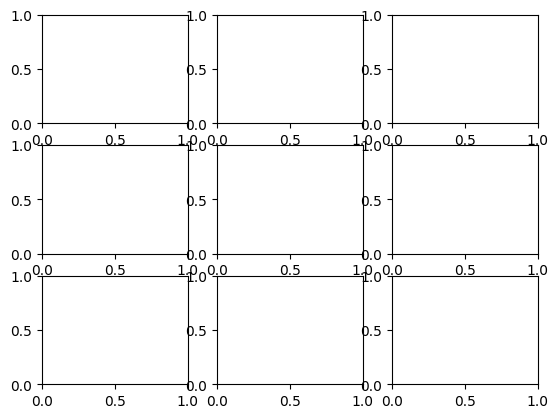

In [14]:
fig, axes = plt.subplots(3, 3)

## Train Logistic Regression Models with Different Penalties and Regularization Parameters
We will train logistic regression models with L1, L2, and Elastic-Net penalties and different values of C. We will increase the tolerance for short training time.

In [15]:
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

## Calculate Sparsity and Scores
We will calculate the sparsity (percentage of zero coefficients) and scores for each model.

In [16]:
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    score_l1_LR = clf_l1_LR.score(X, y)
    score_l2_LR = clf_l2_LR.score(X, y)
    score_en_LR = clf_en_LR.score(X, y)

## Visualize Coefficients
We will visualize the coefficients of the models for each penalty and C value.

In [17]:
    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(np.abs(coefs.reshape(8, 8)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
        ax.set_xticks(())
        ax.set_yticks(())

## Set Titles and Labels
We will set the titles and labels for the subplots.

In [18]:
    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    axes_row[0].set_ylabel("C = %s" % C)

Text(4.444444444444445, 0.5, 'C = 0.01')

##　Print Results
We will print the sparsity and scores for each model.

In [19]:
    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", score_l1_LR))
    print("{:<40} {:.2f}".format("Score with Elastic-Net penalty:", score_en_LR))
    print("{:<40} {:.2f}".format("Score with L2 penalty:", score_l2_LR))

C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


## Display Visualization
We will display the subplots.

In [20]:
plt.show()

## Summary
In this lab, we explored the sparsity of solutions when L1, L2, and Elastic-Net penalty are used for different values of C. We used logistic regression to classify 8x8 images of digits into two classes: 0-4 against 5-9. We visualized the coefficients of the models for varying C. We also calculated the sparsity and scores for each model and printed the results.